<a href="https://colab.research.google.com/github/franco05hk/Bank-Sales-Dashboard-Excel-Projects/blob/main/bank_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from google.colab import drive
drive.mount('/content/drive')

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
url = 'https://raw.githubusercontent.com/franco05hk/Bank-Sales-Dashboard-Excel-Projects/main/bank-direct-marketing-campaigns.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [22]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = df1.copy()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

41188 Clients' data for the campaign have a mean age of 40, range between 17-98, 2.5 number of contacts in average performed during this campaign per client(with min 1 to max 56), no valid findings from pdays and previous for now


<ipython-input-37-b4a75ee26f26>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


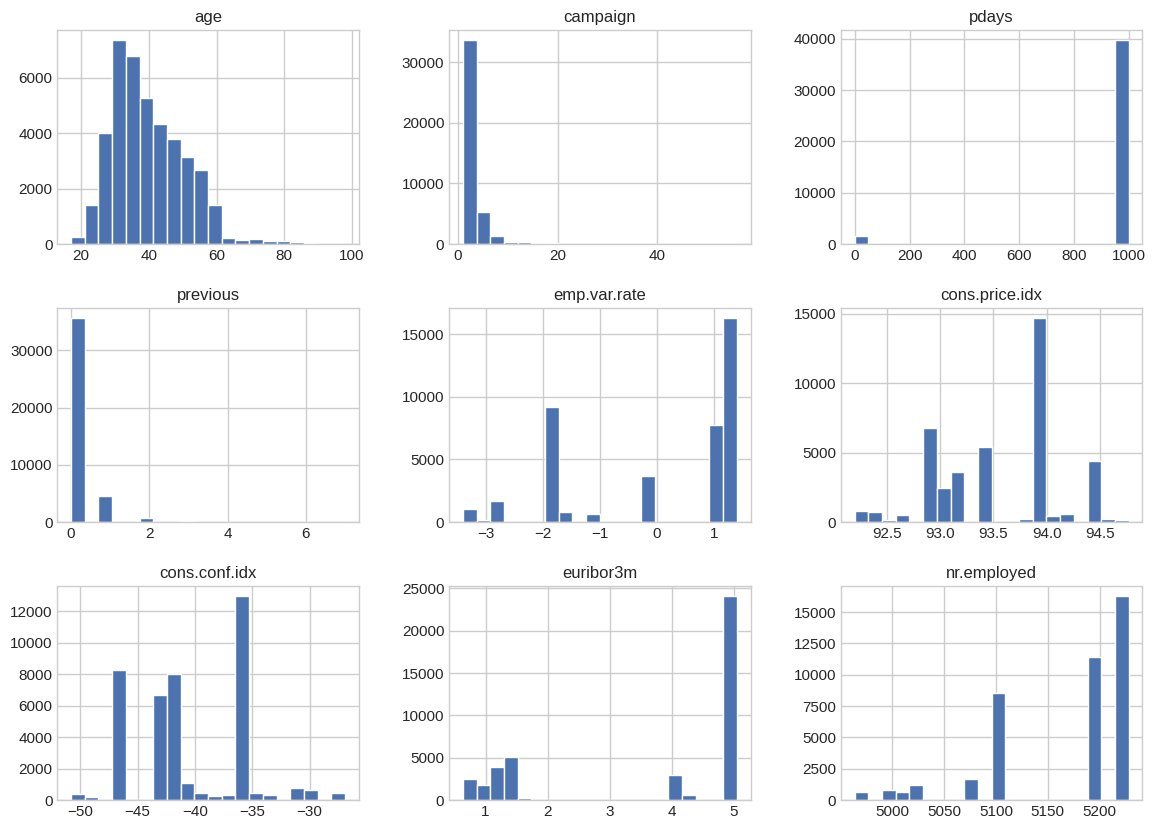

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10))
plt.show()

In [39]:
data = data.drop(columns=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ])
data
# drop the unrelated column

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,yes


<Axes: title={'center': 'Job and subscription'}>

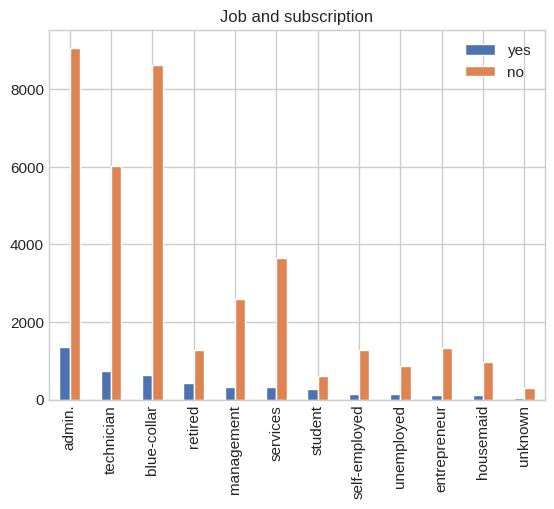

In [44]:
job = pd.DataFrame()

job['yes'] = data[data['y'] == 'yes']['job'].value_counts()
job['no'] = data[data['y'] == 'no']['job'].value_counts()

job.plot.bar(title = 'Job and subscription')


Relatively high proportion in subscription within retired,unemployed and student group, while admin, management and technician seems more likely to subscript when compare to other job.



In [51]:
age = pd.DataFrame()
age['age_yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
age['age_no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

age

,age_yes,age_no
count,4640.000000,36548.000000
mean,40.913147,39.911185
std,13.837476,9.898132
min,17.000000,17.000000
25%,31.000000,32.000000
50%,37.000000,38.000000
75%,50.000000,47.000000
max,98.000000,95.000000


<Axes: title={'center': 'Age and deposit statistics'}>

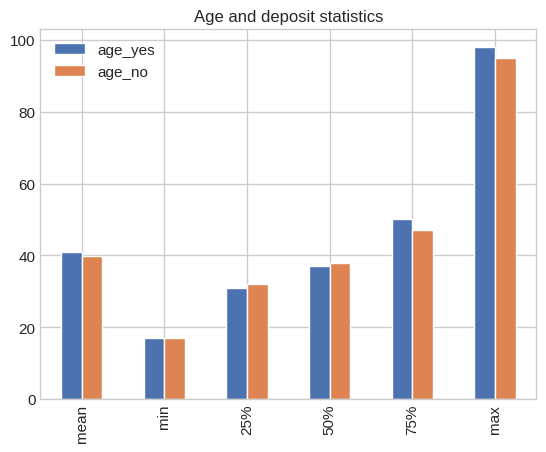

In [52]:
age.drop(['count', 'std']).plot.bar(title = 'Age and deposit statistics')

Seems like clients with age>37 is more tends to subcribe for term deposit.

<Axes: title={'center': 'Marital status and deposit'}>

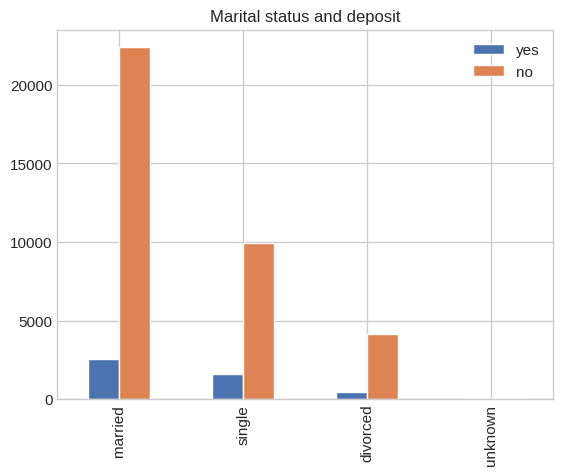

In [55]:
marital = pd.DataFrame()

marital['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
marital['no'] = data[data['y'] == 'no']['marital'].value_counts()

marital.plot.bar(title = 'Marital status and deposit')

Although most of subscribers are from married group, the proportion in single sroup is significantly higher(just the total numbers within group is smaller)

<Axes: title={'center': 'Education and deposit'}>

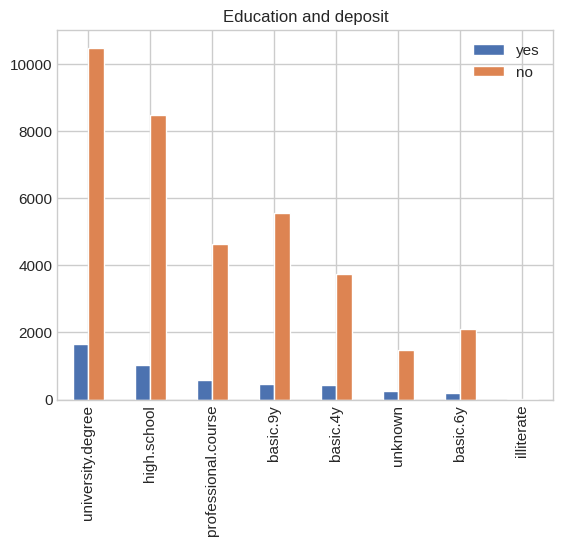

In [57]:
education = pd.DataFrame()

education['yes'] = data[data['y'] == 'yes']['education'].value_counts()
education['no'] = data[data['y'] == 'no']['education'].value_counts()

education.plot.bar(title = 'Education and deposit')

Clients completed university degree, high-school and professional course groups are more tends to subscribe.

<Axes: title={'center': 'Type of contact and deposit'}>

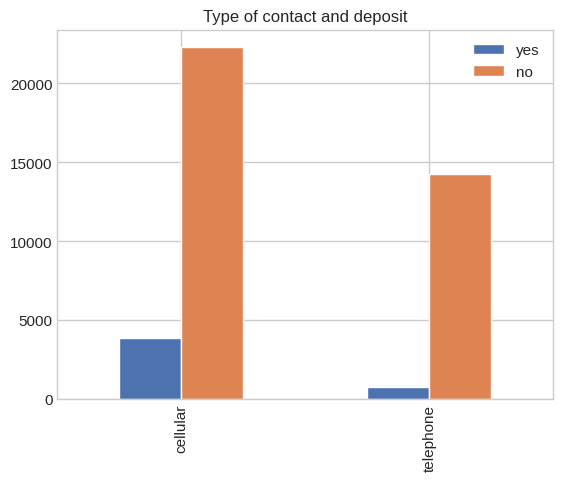

In [58]:
contact = pd.DataFrame()

contact['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
contact['no'] = data[data['y'] == 'no']['contact'].value_counts()

contact.plot.bar(title = 'Type of contact and deposit')

Clients contacted by cellular significantly more likely to join term deposit.

In [61]:
numContact = pd.DataFrame()
numContact['campaign_yes'] = (data[data['y'] == 'yes'][['y','campaign']].describe())['campaign']
numContact['campaign_no'] = (data[data['y'] == 'no'][['y','campaign']].describe())['campaign']

numContact

,campaign_yes,campaign_no
count,4640.000000,36548.000000
mean,2.051724,2.633085
std,1.666245,2.873438
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,2.000000,3.000000
max,23.000000,56.000000


<Axes: title={'center': 'Number of contacts during campaign and result'}>

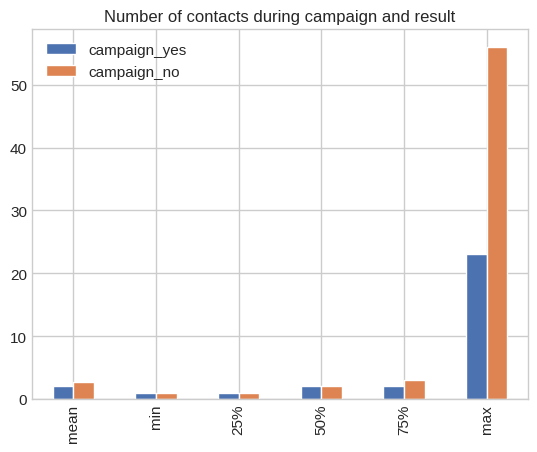

In [62]:
numContact.drop(['count', 'std']).plot.bar(title = 'Number of contacts during campaign and result')

We can see that the more contact result in lower% in saying yes from clients. It'd be more wise to limit the number of contact below mean 2 to optimize the result.

<Axes: title={'center': 'Type of contact and deposit'}>

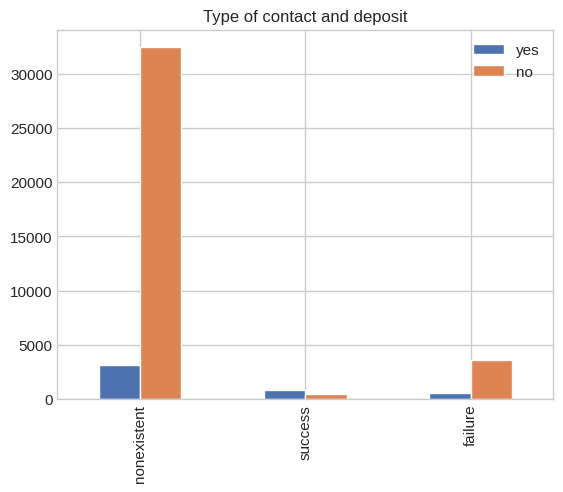

In [73]:
poutcome = pd.DataFrame()

poutcome['yes'] = data[data['y'] == 'yes']['poutcome'].value_counts()
poutcome['no'] = data[data['y'] == 'no']['poutcome'].value_counts()

poutcome.plot.bar(title = 'Type of contact and deposit')

Previously success campaign customer mostly likely will also subscribe in this campaign, while those unsubscribed is also more likely to subscribe this time. Customers that the bank never contact before tends to be more unwilling to subscribe. The bank should make regular contact to keep the active relationship in order to increase their campaign effectiveness.

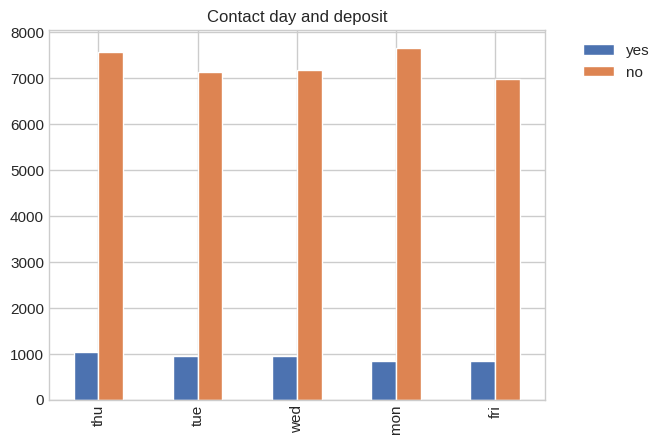

In [85]:
day_of_week = pd.DataFrame()

day_of_week['yes'] = data[data['y'] == 'yes']['day_of_week'].value_counts()
day_of_week['no'] = data[data['y'] == 'no']['day_of_week'].value_counts()

day_of_week.plot.bar(title = 'Contact day and deposit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


Monday call seems to be having lowest success rate of subscription.

<Axes: title={'center': 'Personal loan and deposit'}>

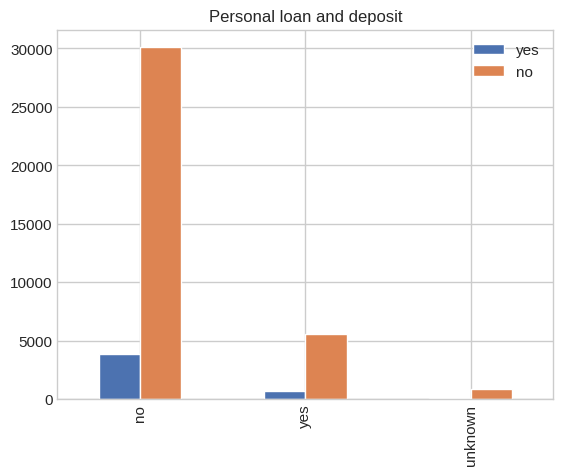

In [86]:
loan = pd.DataFrame()

loan['yes'] = data[data['y'] == 'yes']['loan'].value_counts()
loan['no'] = data[data['y'] == 'no']['loan'].value_counts()

loan.plot.bar(title = 'Personal loan and deposit')

<Axes: title={'center': 'Housing and deposit'}>

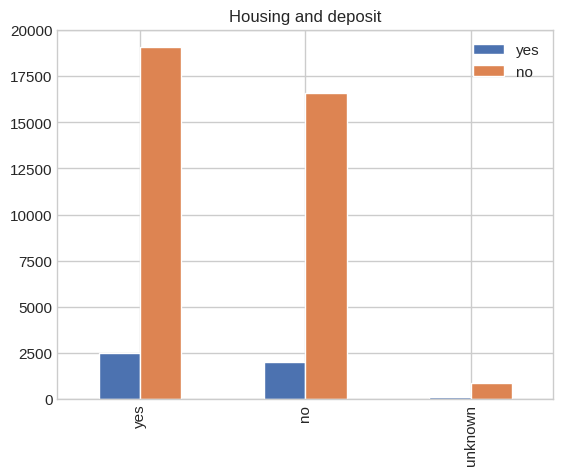

In [88]:
housing = pd.DataFrame()

housing['yes'] = data[data['y'] == 'yes']['housing'].value_counts()
housing['no'] = data[data['y'] == 'no']['housing'].value_counts()

housing.plot.bar(title = 'Housing and deposit')

Clients without personal loan/ with housing seems to be having the largest odd to subscribe.

<Axes: title={'center': 'Month and deposit'}>

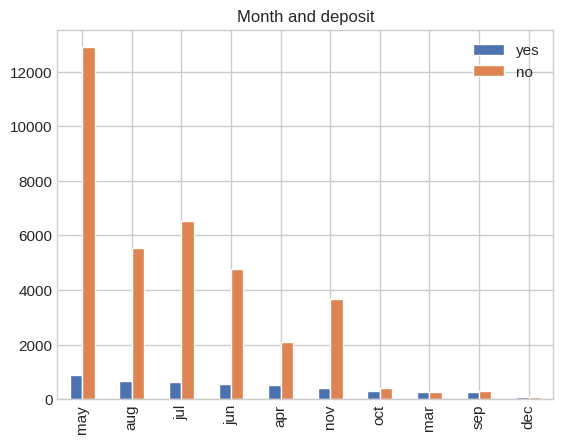

In [89]:
month = pd.DataFrame()

month['yes'] = data[data['y'] == 'yes']['month'].value_counts()
month['no'] = data[data['y'] == 'no']['month'].value_counts()

month.plot.bar(title = 'Month and deposit')

Campaign conduct in Oct, Mar, Sep generates significant better performance than other months.

In [93]:
bank_features=data.copy()
educationGroup=['basic.9y','basic.6y','basic.4y']
for i in educationGroup:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [95]:
print("Job:",data.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",data.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",data.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",data.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",data.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",data.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",data.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",data.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",data.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",data.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",data.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [96]:
numerical_features=['age','campaign']
for cols in numerical_features:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (data[cols] >= Q1 - 1.5 * IQR) & (data[cols] <= Q3 + 1.5 *IQR)
    data=data.loc[filter]

<ipython-input-97-71071cffb521>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'campaign')

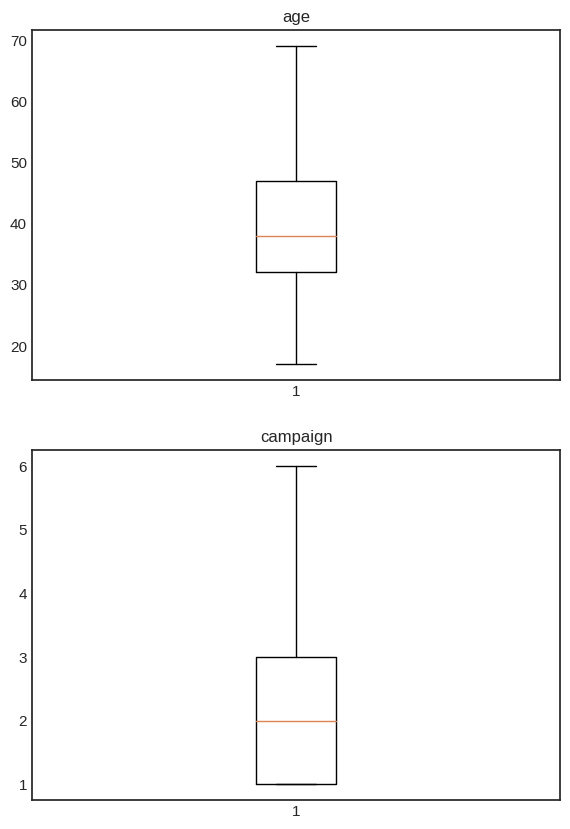

In [97]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['age'])
ax.set_title('age')

ax=plt.subplot(223)
plt.boxplot(data['campaign'])
ax.set_title('campaign')